In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('income.csv')

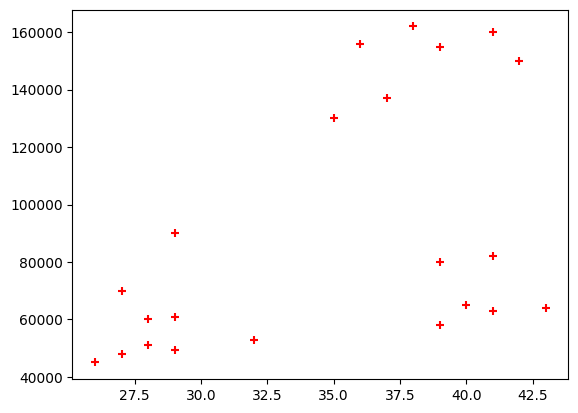

In [4]:
plt.scatter(df['Age'],df['Income($)'],color='red',marker='+')

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [6]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [7]:
y_predict=km.fit_predict(df[['Age','Income($)']])
y_predict

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [8]:
df['cluster']=y_predict
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [9]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

Text(0, 0.5, 'Income($)')

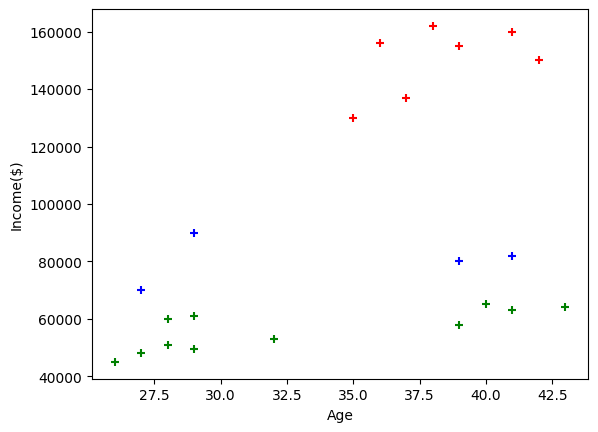

In [11]:
plt.scatter(df1.Age,df1['Income($)'],color='green',marker='+')
plt.scatter(df2.Age,df2['Income($)'],color='red',marker='+')
plt.scatter(df3.Age,df3['Income($)'],color='blue',marker='+')
plt.xlabel('Age')
plt.ylabel('Income($)')

In [12]:
scaler=MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)']=scaler.transform(df[['Income($)']])
df.head()

,Name,Age,Income($),cluster
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1


In [14]:
scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [15]:
y_predict=km.fit_predict(df[['Age','Income($)']])
y_predict

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [16]:
df['cluster']=y_predict
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [17]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

Text(0, 0.5, 'Income($)')

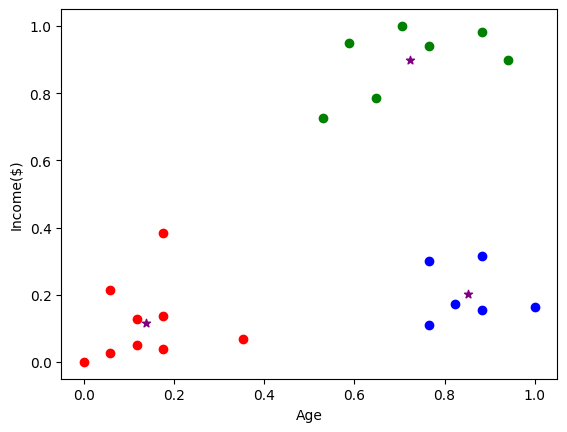

In [19]:
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*')
plt.xlabel('Age')
plt.ylabel('Income($)')

In [20]:
k_range=range(1,10)
sse=[]
for k in k_range:
  km=KMeans(n_clusters=k)
  km.fit(df[['Age','Income($)']])
  sse.append(km.inertia_)

In [21]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3687734076440591,
 0.2664030124668416,
 0.25821107816216954,
 0.1957366745734016,
 0.16236018155398274,
 0.10383752586603562]

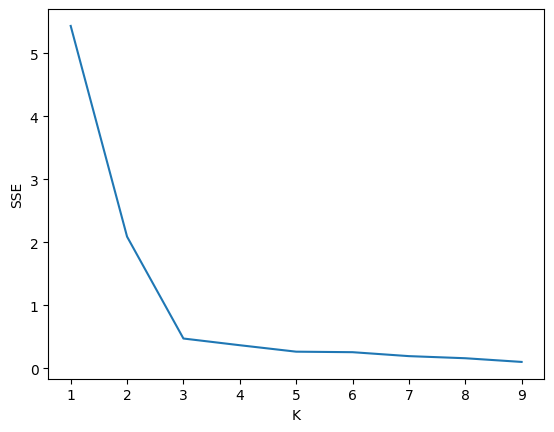

In [22]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_range,sse)